In [45]:
import pandas as pd

In [46]:
df = pd.read_csv("employee_churn_data_clean.csv")
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,0,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,1,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,1,6.0,0.446823,0,184.416084,0
3,logistics,0,0.675158,4,2,8.0,0.440139,0,188.707545,0
4,sales,0,0.676203,3,2,5.0,0.577607,1,179.821083,0
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,1,8.0,0.543641,0,188.155738,1
9536,logistics,0,0.746887,3,1,8.0,0.549048,0,188.176164,1
9537,operations,0,0.557980,3,0,7.0,0.705425,0,186.531008,1
9538,IT,0,0.584446,4,1,8.0,0.607287,1,187.641370,1


<Axes: >

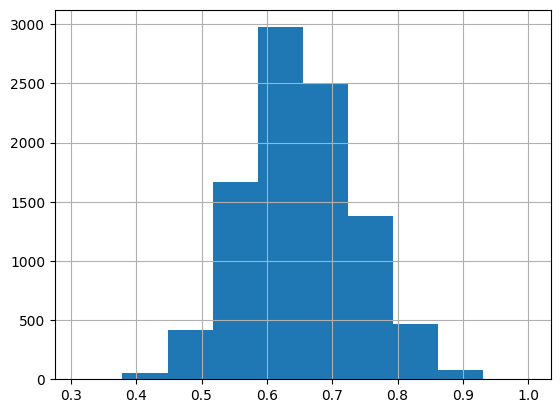

In [47]:
df["review"].hist()

<Axes: >

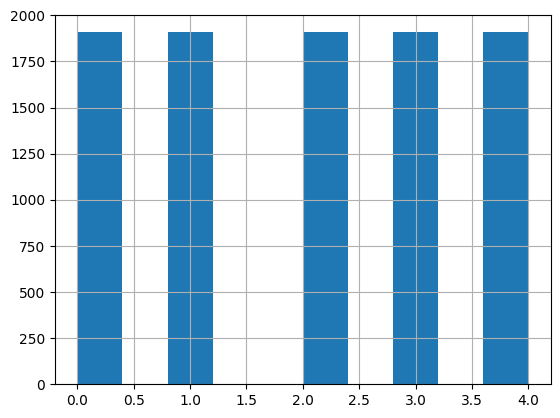

In [48]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
df["review"] = discretizer.fit_transform(df["review"].to_numpy().reshape(-1, 1))
df["review"].hist()


<Axes: >

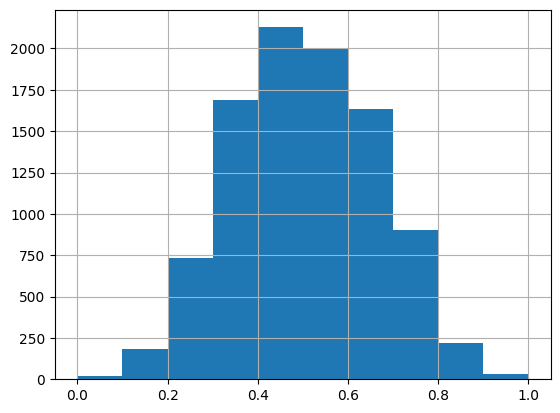

In [49]:
df['satisfaction'].hist()

<Axes: >

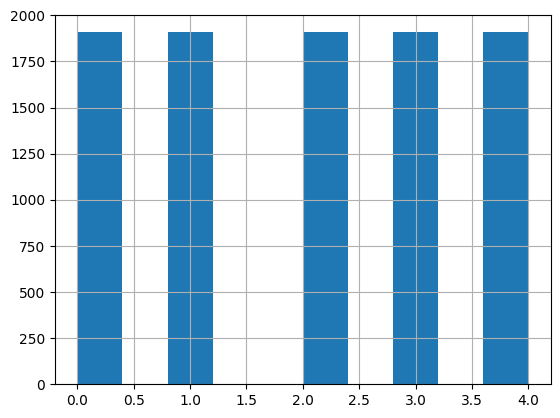

In [50]:
discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
df["satisfaction"] = discretizer.fit_transform(df["satisfaction"].to_numpy().reshape(-1, 1))
df["satisfaction"].hist()

<Axes: >

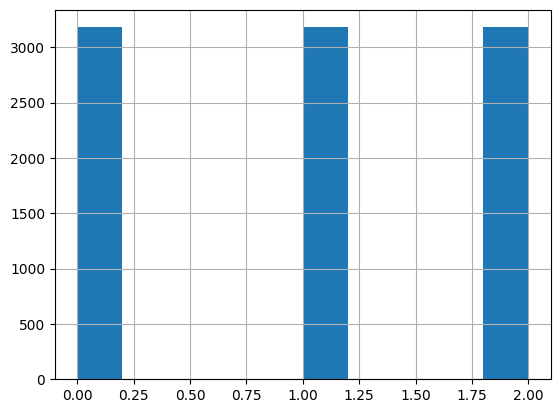

In [51]:
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal")
df["avg_hrs_month"] = discretizer.fit_transform(df["avg_hrs_month"].to_numpy().reshape(-1, 1))
df["avg_hrs_month"].hist()

In [52]:
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=10, binary=True)
encoded = hasher.fit_transform(df["department"])
encoded = pd.DataFrame(encoded.A, columns=[f"department_{i}" for i in range(hasher.n_features)])
df = pd.concat([encoded.set_index(df.index),df], axis=1)
df = df.drop(["department"],axis=1)
df

TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
df.to_csv("employee_churn_data_clearned.csv", index= False)

In [ ]:
df

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9
0,0,0.0,3,0,5.0,3.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,4.0,3,1,6.0,1.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,3.0,3,1,6.0,1.0,0,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,3.0,4,2,8.0,1.0,0,2.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.0,3,2,5.0,3.0,1,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,1.0,4,1,8.0,2.0,0,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9536,0,4.0,3,1,8.0,3.0,0,2.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9537,0,0.0,3,0,7.0,4.0,0,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9538,0,1.0,4,1,8.0,3.0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df["avg_hrs_month"].describe()

count    9540.000000
mean        1.000000
std         0.816539
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: avg_hrs_month, dtype: float64